In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Rank,Country,Revenues,Expenditures,Surplus (or deficit),Surplus percentage of GDP,Year
0,0,1,United States,6715033,7547180,"−832,147",−3.9%,2019 est.[3]
1,1,2,China,3312308,3787245,"−474,937",−4.0%,2017 est.[4]
2,2,3,Japan,1678000,1888000,"−210,000",−4.6%,2017 est.[1]
3,3,4,Germany,1665000,1619000,46000,1.3%,2017 est.[5]
4,4,5,France,1334000,1412000,"−78,000",−3.1%,2017 est.[1]


In [3]:
data = df[['Country','Revenues','Expenditures']].head(10)
data.set_index('Country', inplace=True)
data['Revenues'] = data['Revenues'].astype(float)
data['Revenues'] = data['Revenues'] / 1000
data['Expenditures'] = data['Expenditures'].astype(float)
data['Expenditures'] = data['Expenditures'] / 1000 * (-1)
data

,Revenues,Expenditures
Country,,
United States,6715.033,-7547.180
China,3312.308,-3787.245
Japan,1678.000,-1888.000
Germany,1665.000,-1619.000
France,1334.000,-1412.000
United Kingdom,1077.300,-1120.000
Italy,884.500,-927.800
India,631.687,-808.052
Canada,623.700,-657.400


In [4]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = data.index
column0 = data['Expenditures']
column1 = data['Revenues']
title0 = 'Expenditures, USD thousand'
title1 = 'Revenues, USD thousand'

<IPython.core.display.Javascript object>


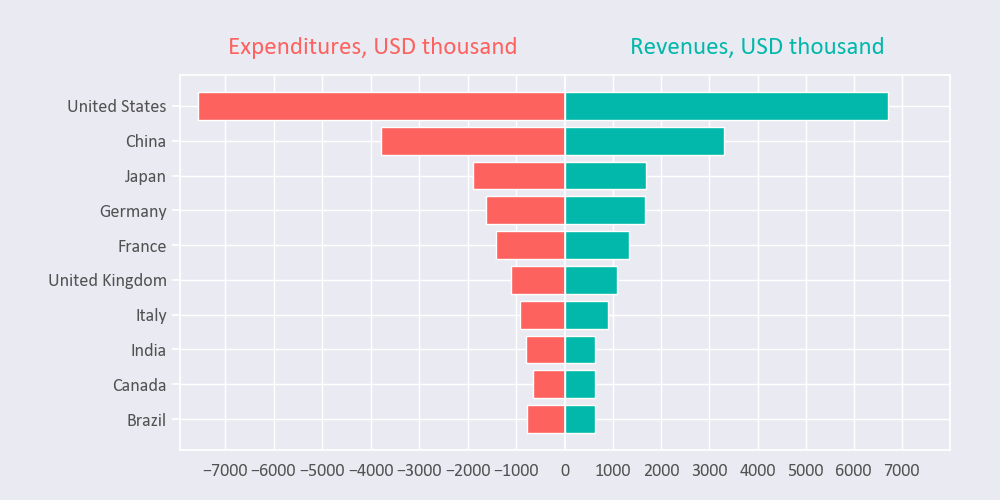

In [7]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

plt.gca().invert_yaxis()

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white')

axes[1].set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
axes[1].set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [8]:
filename = 'mpl-bidirectional'
plt.savefig(filename+'.png', facecolor=facecolor)